In [1]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import math

In [2]:
## Read in self alignment files
bt_cutoff = 90
gdsmp = {}
with open('gdlist') as g:
    lines = g.readlines()
    for line in lines:
        sp = line[:-1]
        gdsmp[sp] = []
        fn = 'self-align/' + sp + '.out'
        with open(fn) as gg:
            nelines = gg.readlines()
            for nline in nelines:
                tmp = nline.split('_')[2]
                tmp1 = tmp.split('/')[0]
                tmp2 = tmp.split(':')[1]
                tmp3 = tmp2.split('%')[0]
                perc = float(tmp3)
                if perc > bt_cutoff:
                    gdsmp[sp].append(tmp1)                

In [3]:
## Read species metadata
species_taxa={}
with open('unique_clusters.csv') as g:
    lines = g.readlines()
    for line in lines:
        tmp = line.split(',')
        species_taxa[tmp[0]] = tmp[11]

Text(0, 0.5, 'Proportion of SAGs from Species B that covers the HGT sequence')

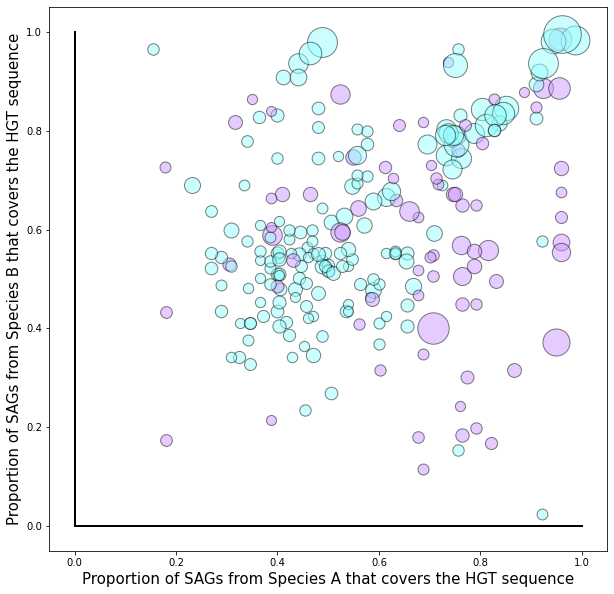

In [5]:
## Plot HGT sequence prevalence in both species
fig, ax = plt.subplots(1, figsize=(10, 10))

Mixing_ratio = 0.2
tot_sag = 20000 ## Total SAG numbers

cutoff = 500 ## Threshold for considering a SAG covers the HGT sequence
ct1 = 0.05

pvals = []
sizes = []
nums= []
mkl = 0

colors={}
colors['A'] = '#FF99CC'
colors['B'] = '#99FFFF'
colors['F'] = '#CC99FF'
colors['P'] = '#FFCC99'
colors['FS'] = '#99CC99'
colors['C'] = 'yellow'

with open('list2.txt') as g:
    lines = g.readlines()
    for line in lines:
        mkl=mkl+1
        fn1 = line[:-1]
        fn2 = 'data/'+fn1+'.out'
        a1 = 0 
        a2 = 0
        b1 = 0
        b2 = 0
        s1 = fn1.split('_')[0]  # Species A (strain) bin ID
        s2 = fn1.split('_')[1] # Species B (strain) bin ID
        sp1 = s1.split('-')[0]
        sp2 = s2.split('-')[0]
        phy1 = species_taxa[sp1]
        phy2 = species_taxa[sp2]
        with open('data/'+fn1+'.len') as abc:
            ABC = abc.readlines()
            contig_length = float(ABC[0].split(' ')[0]) - len(fn1)-2
        with open(fn2) as g2: # Read the intermediary results for HGT sequence alignment
            newlines = g2.readlines()
            for nl in newlines[:-1]:
                tmp0 = nl.split('_')[0]
                tmp1 = tmp0.split(' ')
                tmp2 = nl.split('_')[1]
                tmp3 = tmp2.split('/')[0] # SAG ID
                
                t1 = tmp1[-2] # Number of nucleotide from the HGT that is covered by the SAG
                t2 = tmp1[-1] # The species/strain-level bin ID that corresponds to the SAG
                if t2 in gdsmp:
                    if tmp3 in gdsmp[t2]: # If the SAG pass the purity threshold
                        if t2 == s1:
                            a1 = a1+1 # Total SAG from species/strain A
                            if int(t1)>cutoff or int(t1)>ct1*contig_length:
                                a2 = a2+1 # Total SAG from species/strain A that covers the HGT sequence
                        elif t2 == s2:
                            b1 = b1+1 # Total SAG from species/strain B
                            if int(t1)>cutoff or int(t1)>ct1*contig_length:
                                b2 = b2+1 # Total SAG from species/strain B that covers the HGT sequence
                                
        if a1>0 and b1>0:
            x1 = float(a2)/float(a1)
            x2 = float(b2)/float(b1)
            prob1 = binom.sf(a2,a1,0.2*b1/tot_sag)
            prob2 = binom.sf(b2,b1,0.2*a1/tot_sag)
            if prob1>1e-150:
                pvals.append(0-math.log10(prob1))
            else:
                pvals.append(150)
            if prob2>1e-150:
                pvals.append(0-math.log10(prob2))
            else:
                pvals.append(150)
            sizes.append(math.log10(contig_length))
            nums.append(a1)
            if s1!='26-2' and s2!='26-2':
                if phy1 == phy2:
                        if phy1 == 'firmicutes':
                            cat = 'F'
                        elif phy1 == 'bacteroidetes':
                            cat = 'B'
                        else:
                            cat = 'C'
                else:
                    cat = 'C'
                if x1>0 and x2>0:
                    plt.scatter(x1,x2,s=contig_length/50, color=colors[cat], alpha=0.5,edgecolors='black')
                if x1<0.1 or x2<0.1:
#                     plt.text(x1,x2,fn1)
                    mixed_1 = 0 #Mixing_ratio*ab2/float(tot)
                    mixed_2 = 0 #Mixing_ratio*ab1/float(tot)
                    x = np.linspace(0,1, 100)
                    y = np.linspace(mixed_1,mixed_1, 100)
                    line1 = plt.plot(x, y,color='black')
                    y = np.linspace(mixed_2,mixed_2, 100)
                    line1 = plt.plot(y, x,color='black')

# Create the figure
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

# legend_elements = [Patch(facecolor=colors['B'], edgecolor=colors['B'],label='Bacteroidetes-Bacteroidetes'),
#                    Patch(facecolor=colors['F'], edgecolor=colors['F'],label='Firmicutes-Firmicutes'),
#                    Patch(facecolor=colors['C'], edgecolor=colors['C'],label='Cross-phyla')]
# plt.legend(handles=legend_elements, loc='right')
plt.xlabel('Proportion of SAGs from Species A that covers the HGT sequence',fontsize=15)
plt.ylabel('Proportion of SAGs from Species B that covers the HGT sequence',fontsize=15)



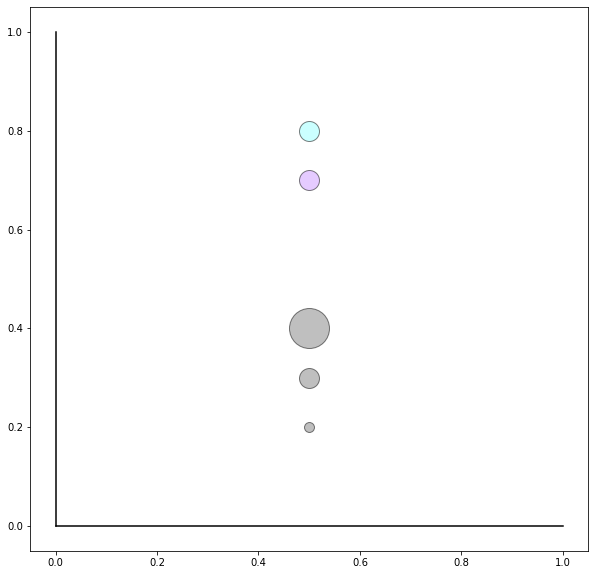

In [6]:
# Generate figure legend
fig, ax = plt.subplots(1, figsize=(10, 10))
x = np.linspace(0,1, 100)
y = np.linspace(mixed_1,mixed_1, 100)
line1 = plt.plot(x, y,color='black')
line1 = plt.plot(y, x,color='black')
plt.scatter(0.5,0.2,s=5000/50, color='gray', alpha=0.5,edgecolors='black')
plt.scatter(0.5,0.3,s=20000/50, color='gray', alpha=0.5,edgecolors='black')
plt.scatter(0.5,0.4,s=80000/50, color='gray', alpha=0.5,edgecolors='black')


plt.scatter(0.5,0.8,s=20000/50, color=colors['B'], alpha=0.5,edgecolors='black')
plt.scatter(0.5,0.7,s=20000/50, color=colors['F'], alpha=0.5,edgecolors='black')


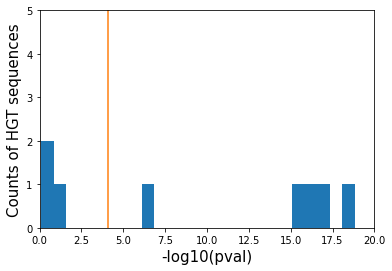

268


In [7]:
## Plot pvalues for the subset
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(170, 10, 250)

plt.hist(pvals,200)
plt.xlabel('-log10(pval)',fontsize=15)
plt.ylabel('Counts of HGT sequences',fontsize=15)
plt.xlim([0,20])

plt.ylim([0,5])
plt.plot([0-math.log10(8e-5),0-math.log10(8e-5)],[0,20])
plt.show() 
print(mkl)

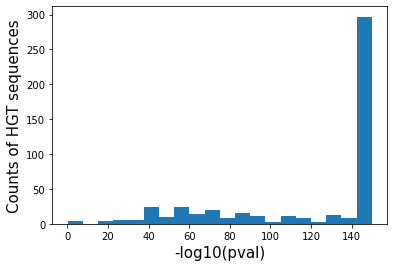

In [8]:
## Plot all p-values
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(170, 10, 250)

plt.hist(pvals,20)
plt.xlabel('-log10(pval)',fontsize=15)
plt.ylabel('Counts of HGT sequences',fontsize=15)


plt.show() 